In [2]:
import numpy as np
import random
import gym
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from collections import deque

In [3]:
# 하이퍼 매개변수 설정
rho=0.9 # 학습률
lamda=0.99 # 할인율
eps=0.9
eps_decay=0.999
batch_siz=64
n_episode=100

# 신경망을 설계해주는 함수
def deep_network():
    mlp=Sequential()
    mlp.add(Dense(32,input_dim=env.observation_space.shape[0],activation='relu'))
    mlp.add(Dense(32,activation='relu'))
    mlp.add(Dense(env.action_space.n,activation='linear'))
    mlp.compile(loss='mse',optimizer='Adam')
    return mlp

# DQN 학습
def model_learning():
    mini_batch=np.asarray(random.sample(D,batch_siz))
    state=np.asarray([mini_batch[i,0] for i in range(batch_siz)])
    action=mini_batch[:,1]
    reward=mini_batch[:,2]
    state1=np.asarray([mini_batch[i,3] for i in range(batch_siz)])
    done=mini_batch[:,4]

    target=model.predict(state)
    target1=model.predict(state1)

    for i in range(batch_siz):
        if done[i]:
            target[i][action[i]]=reward[i]
        else:
            target[i][action[i]]+=rho*((reward[i]+lamda*np.amax(target1[i]))-target[i][action[i]]) # Q 러닝(식 (9.19))
    model.fit(state,target,batch_size=batch_siz,epochs=1,verbose=0)

env=gym.make("CartPole-v0")

model=deep_network() # 신경망 생성
D=deque(maxlen=2000) # 리플레이 메모리 초기화
scores=[]
max_steps=env.spec.max_episode_steps

# 신경망 학습
for i in range(n_episode):
    s=env.reset()
    long_reward=0

    while True:
        r=np.random.random()
        eps=max(0.01,eps*eps_decay) # 엡시론을 조금씩 줄여나감
        if(r<eps):
            a=np.random.randint(0,env.action_space.n) # 랜덤 정책
        else:
            q=model.predict(np.reshape(s,[1,4])) # 신경망이 예측한 행동
            a=np.argmax(q[0])
        s1,r,done,_=env.step(a)
        if done and long_reward<max_steps-1: # 실패
            r=-100

        D.append((s,a,r,s1,done))

        if len(D)>batch_siz*3:
            model_learning()

        s=s1
        long_reward+=r
        
        if done:
            long_reward=long_reward if long_reward==max_steps else long_reward+100
            print(i,"번째 에피소드의 점수:",long_reward)
            scores.append(long_reward)
            break

    if i>10 and np.mean(scores[-5:])>(0.95*max_steps):
        break
    
# 신경망 저장
model.save("./cartpole_by_DQN.h5")
env.close()


0 번째 에피소드의 점수: 11.0
1 번째 에피소드의 점수: 22.0
2 번째 에피소드의 점수: 11.0
3 번째 에피소드의 점수: 20.0
4 번째 에피소드의 점수: 28.0
5 번째 에피소드의 점수: 36.0
6 번째 에피소드의 점수: 15.0
7 번째 에피소드의 점수: 18.0


C:\Users\User\AppData\Local\Temp/ipykernel_9628/3550851646.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mini_batch=np.asarray(random.sample(D,batch_siz))


8 번째 에피소드의 점수: 41.0
9 번째 에피소드의 점수: 9.0
10 번째 에피소드의 점수: 14.0
11 번째 에피소드의 점수: 14.0
12 번째 에피소드의 점수: 13.0
13 번째 에피소드의 점수: 11.0
14 번째 에피소드의 점수: 15.0
15 번째 에피소드의 점수: 14.0
16 번째 에피소드의 점수: 12.0
17 번째 에피소드의 점수: 12.0
18 번째 에피소드의 점수: 14.0
19 번째 에피소드의 점수: 20.0
20 번째 에피소드의 점수: 14.0
21 번째 에피소드의 점수: 11.0
22 번째 에피소드의 점수: 11.0
23 번째 에피소드의 점수: 8.0
24 번째 에피소드의 점수: 12.0
25 번째 에피소드의 점수: 15.0
26 번째 에피소드의 점수: 10.0
27 번째 에피소드의 점수: 12.0
28 번째 에피소드의 점수: 18.0
29 번째 에피소드의 점수: 8.0
30 번째 에피소드의 점수: 14.0
31 번째 에피소드의 점수: 10.0
32 번째 에피소드의 점수: 21.0
33 번째 에피소드의 점수: 43.0
34 번째 에피소드의 점수: 44.0
35 번째 에피소드의 점수: 76.0
36 번째 에피소드의 점수: 79.0
37 번째 에피소드의 점수: 87.0
38 번째 에피소드의 점수: 87.0
39 번째 에피소드의 점수: 55.0
40 번째 에피소드의 점수: 55.0
41 번째 에피소드의 점수: 53.0
42 번째 에피소드의 점수: 102.0
43 번째 에피소드의 점수: 50.0
44 번째 에피소드의 점수: 73.0
45 번째 에피소드의 점수: 58.0
46 번째 에피소드의 점수: 72.0
47 번째 에피소드의 점수: 170.0
48 번째 에피소드의 점수: 95.0
49 번째 에피소드의 점수: 97.0
50 번째 에피소드의 점수: 200.0
51 번째 에피소드의 점수: 163.0
52 번째 에피소드의 점수: 200.0
53 번째 에피소드의 점수: 197.0
54 번째 에피소드의 점수: 200.0


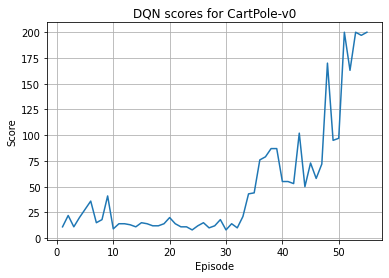

In [4]:
import matplotlib.pyplot as plt

plt.plot(range(1,len(scores)+1),scores)
plt.title('DQN scores for CartPole-v0')
plt.ylabel('Score')
plt.xlabel('Episode')
plt.grid()
plt.show()

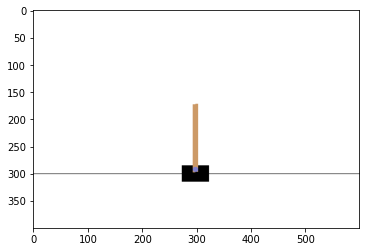

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import numpy as np
import gym
import time
from IPython import display

# 신경망 블러옴
model=load_model('./cartpole_by_DQN.h5')

env=gym.make("CartPole-v0")
long_reward=0

# CartPole 플레이
s=env.reset()
while True:   
    
    q=model.predict(np.reshape(s,[1,4])) # 신경망이 예측한 행동
    a=np.argmax(q[0])
    s1,r,done,_=env.step(a)
    s=s1
    long_reward+=r

    plt.imshow(env.render(mode='rgb_array'))
    display.display(plt.gcf())
    display.clear_output(wait=True)

    if done:
        print("에피소드의 점수:",long_reward)
        break

env.close()

In [7]:
!pip install pyglet

In [10]:
from IPython import display